In [1]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization (optional for EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Replace with your local file paths if needed
train_df = pd.read_csv('train.csv')  # your train CSV
test_df = pd.read_csv('test.csv')    # your test CSV


In [4]:
# Features and label for training
X_train = train_df.drop('fake', axis=1)
y_train = train_df['fake']

# Features and label for testing
X_test = test_df.drop('fake', axis=1)
y_test = test_df['fake']


In [6]:
train_df
     

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [9]:
test_df

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [11]:
#Check if null values exist
train_df.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [12]:

#Number of unique values in the profile pic column
train_df['profile pic'].value_counts()

profile pic
1    404
0    172
Name: count, dtype: int64

In [13]:

#Number of fake and real accounts
train_df['fake'].value_counts()

fake
0    288
1    288
Name: count, dtype: int64

In [14]:

#Number of accounts having an external URL
train_df['external URL'].value_counts()

external URL
0    509
1     67
Name: count, dtype: int64

In [16]:
#Number of accounts having description length over 50
(train_df['description length'] > 50).sum()

np.int64(98)

In [17]:

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB


In [19]:

test_df.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000
mean,0.758333,0.179917,1.550000,0.071333,0.041667,27.200000,0.100000,0.308333,82.866667,4.959472e+04,779.266667,0.500000
std,0.429888,0.241492,1.187116,0.209429,0.200664,42.588632,0.301258,0.463741,230.468136,3.816126e+05,1409.383558,0.502096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.725000e+01,119.250000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.165000e+02,354.500000,0.500000
75%,1.000000,0.330000,2.000000,0.000000,0.000000,45.250000,0.000000,1.000000,58.250000,5.932500e+02,668.250000,1.000000
max,1.000000,0.890000,9.000000,1.000000,1.000000,149.000000,1.000000,1.000000,1879.000000,4.021842e+06,7453.000000,1.000000


<Axes: ylabel='count'>

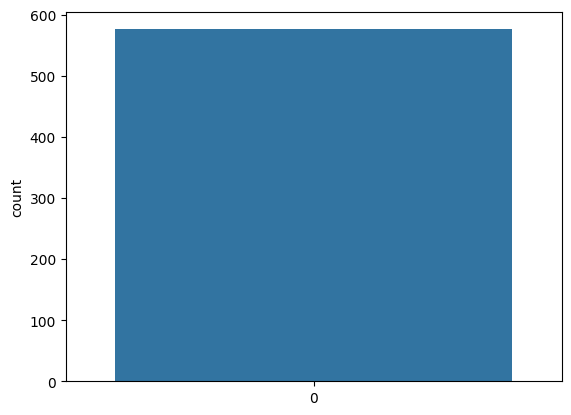

In [21]:

#Vislualizing the number of fake and real accounts (using seaborn library)
sns.countplot(train_df['fake'])

<Axes: ylabel='count'>

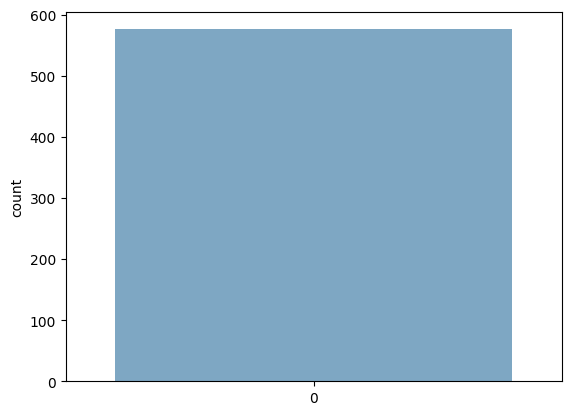

In [22]:

#Visualizing the private column
sns.countplot(train_df['private'],palette = "PuBu")

<Axes: ylabel='count'>

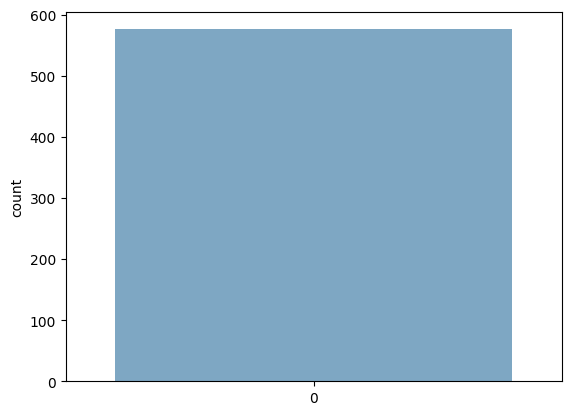

In [24]:
#Visualizing the private column
sns.countplot(train_df['private'],palette = "PuBu")

<Axes: xlabel='nums/length username', ylabel='Density'>

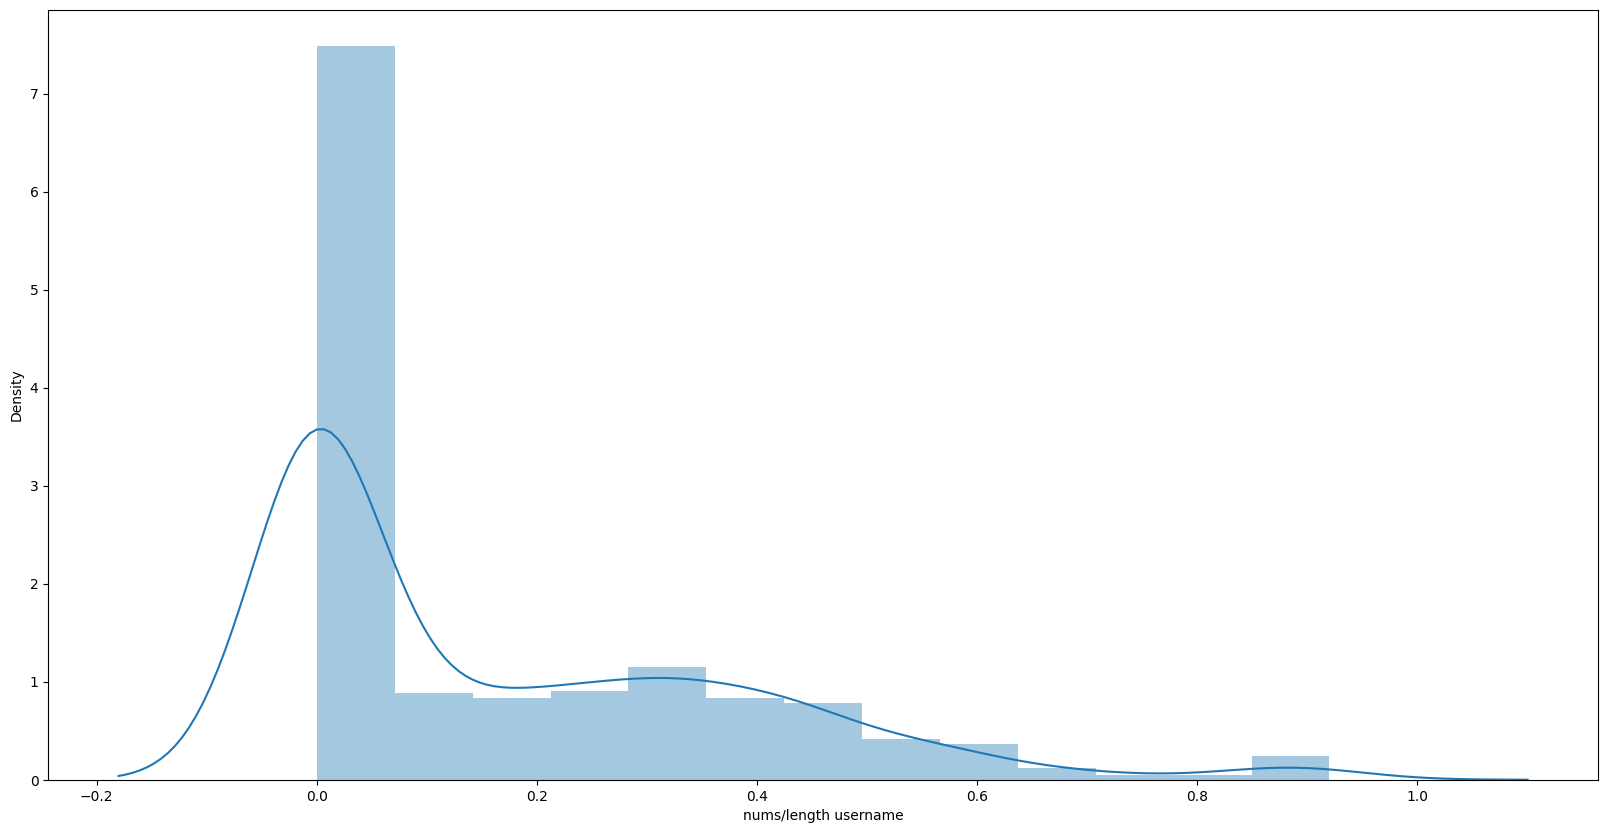

In [25]:
#Visualizing the length of usernames(Histogram)
plt.figure(figsize = (20, 10))
sns.distplot(train_df['nums/length username'],kde=True)
     

<Axes: >

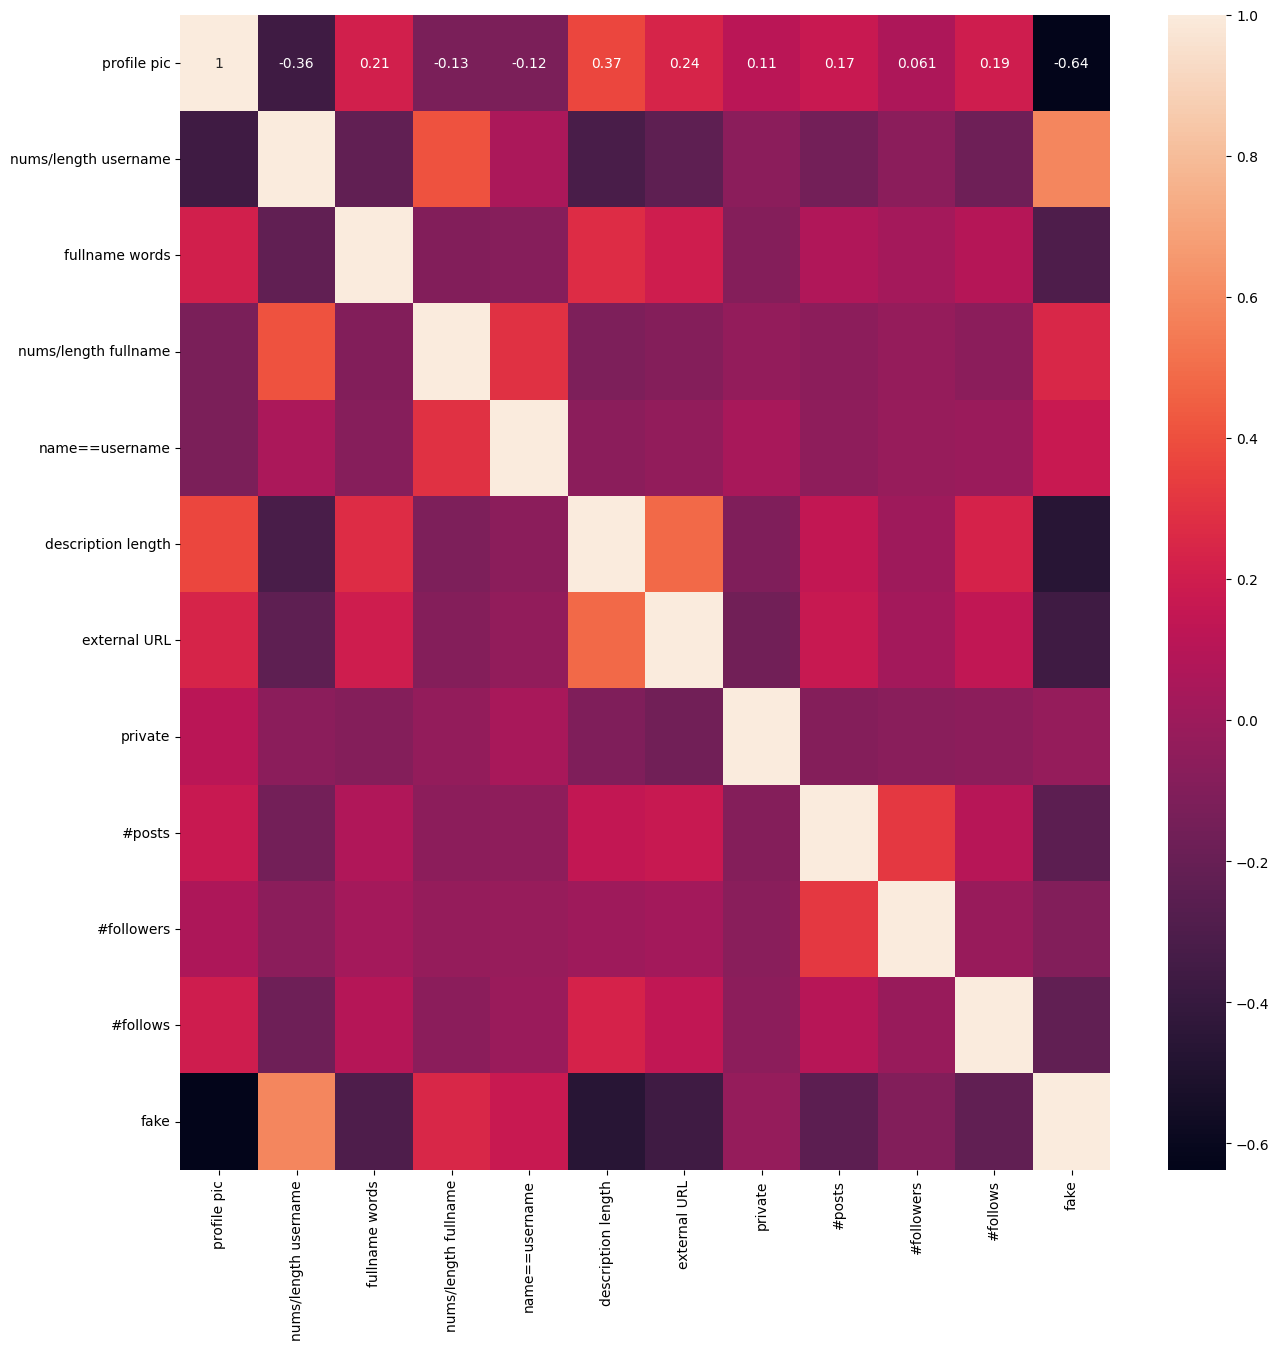

In [26]:

#Correlation heatmap
plt.figure(figsize=(15,15))
cm = train_df.corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

<Axes: ylabel='count'>

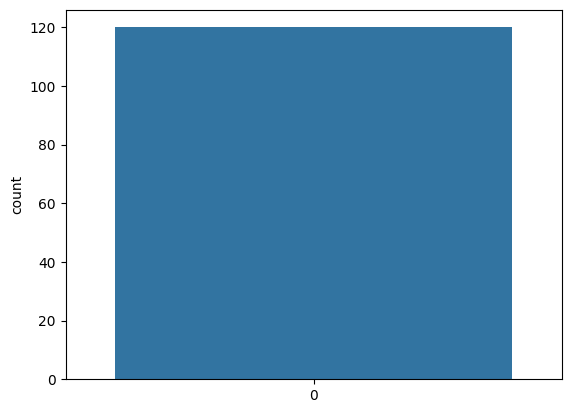

In [27]:
sns.countplot(test_df['fake'])

In [28]:
x_train = train_df.drop(columns = ['fake'])
x_test = test_df.drop(columns = ['fake'])
x_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.00,0,53,0,0,32,1000,955
1,1,0.00,2,0.00,0,44,0,0,286,2740,533
2,1,0.10,2,0.00,0,0,0,1,13,159,98
3,1,0.00,1,0.00,0,82,0,0,679,414,651
4,1,0.00,2,0.00,0,0,0,1,6,151,126
...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596
572,1,0.38,1,0.33,0,21,0,0,44,66,75
573,1,0.57,2,0.00,0,0,0,0,4,96,339
574,1,0.57,1,0.00,0,11,0,0,0,57,73


In [29]:
x_test


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.33,1,0.33,1,30,0,1,35,488,604
1,1,0.00,5,0.00,0,64,0,1,3,35,6
2,1,0.00,2,0.00,0,82,0,1,319,328,668
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369
4,1,0.50,1,0.00,0,76,0,1,6,225,356
...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811
116,1,0.40,1,0.00,0,0,0,0,4,150,164
117,1,0.00,2,0.00,0,0,0,0,3,833,3572
118,0,0.17,1,0.00,0,0,0,0,1,219,1695


In [30]:

#Preparing the outputs (Takin only the fake column into consideration.)
y_train = train_df['fake']
y_test = test_df['fake']
y_train

0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 576, dtype: int64

In [31]:
y_test


0      0
1      0
2      0
3      0
4      0
      ..
115    1
116    1
117    1
118    1
119    1
Name: fake, Length: 120, dtype: int64

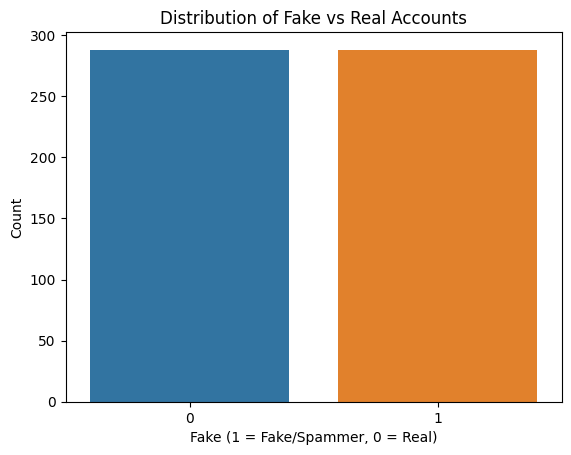

In [38]:
sns.countplot(x='fake', data=train_df)
plt.title('Distribution of Fake vs Real Accounts')
plt.xlabel('Fake (1 = Fake/Spammer, 0 = Real)')
plt.ylabel('Count')
plt.show()


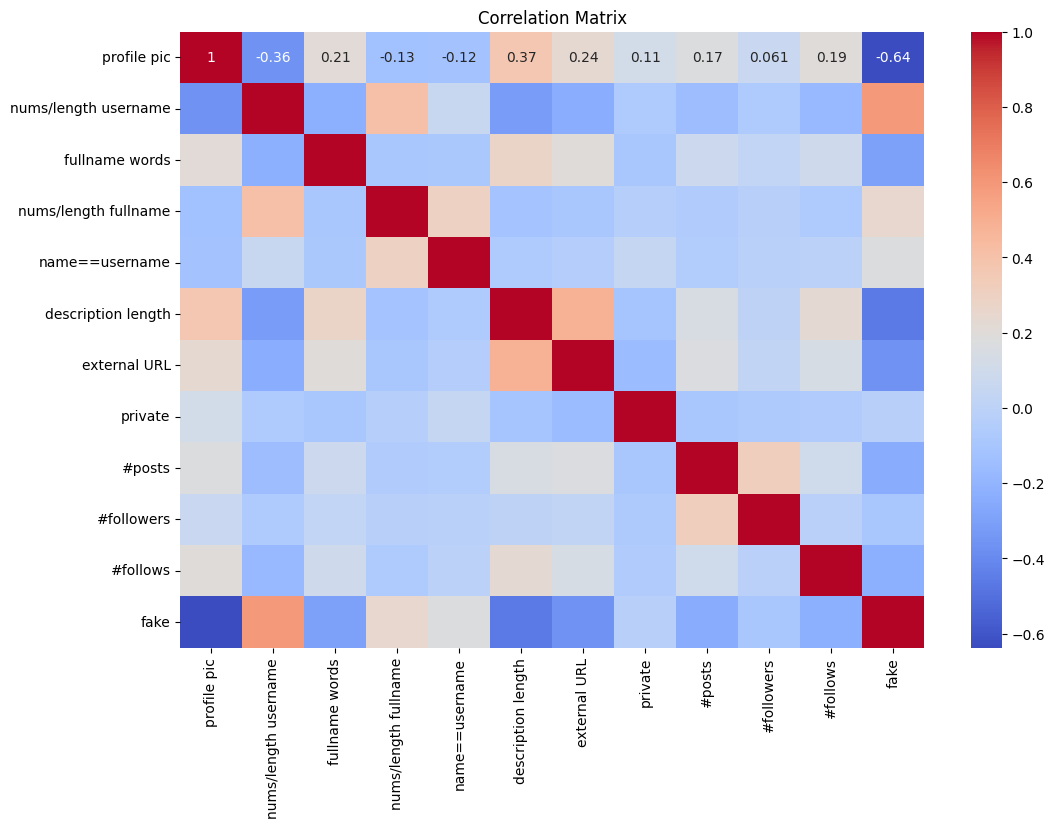

In [55]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


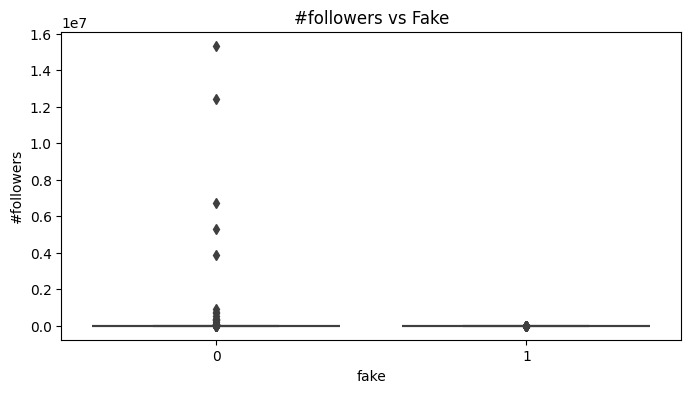

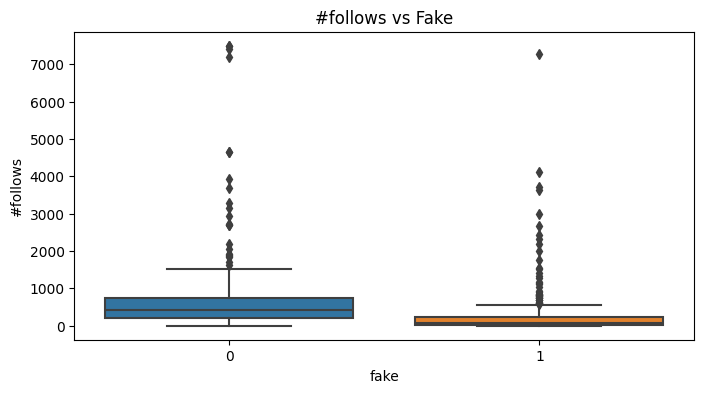

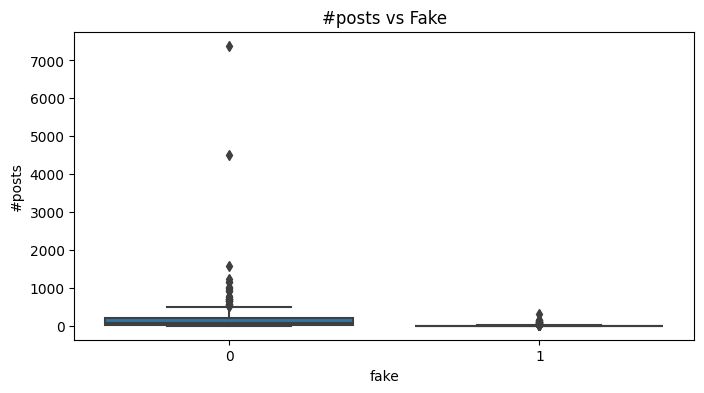

In [40]:
features = ['#followers', '#follows', '#posts']
for col in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='fake', y=col, data=train_df)
    plt.title(f"{col} vs Fake")
    plt.show()


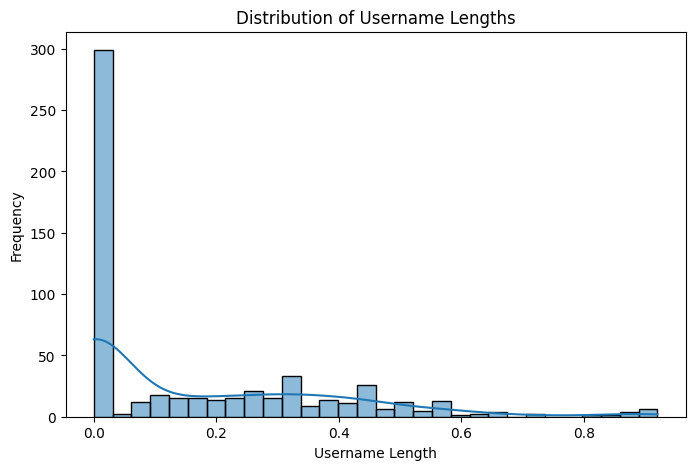

In [51]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='nums/length username', bins=30, kde=True)
plt.title('Distribution of Username Lengths')
plt.xlabel('Username Length')
plt.ylabel('Frequency')
plt.show()


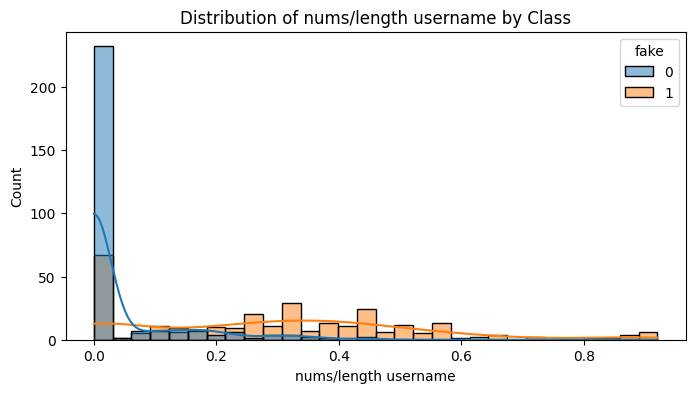

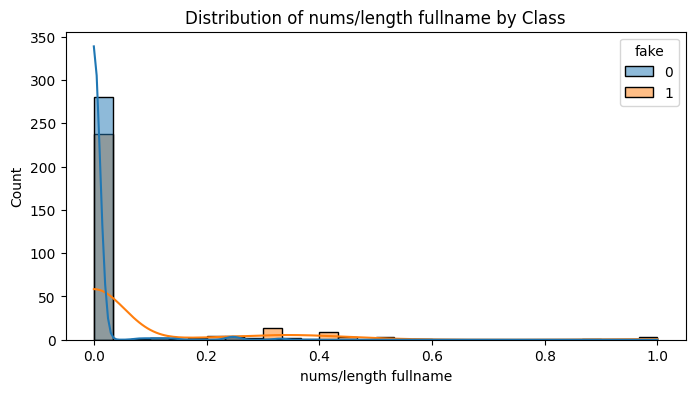

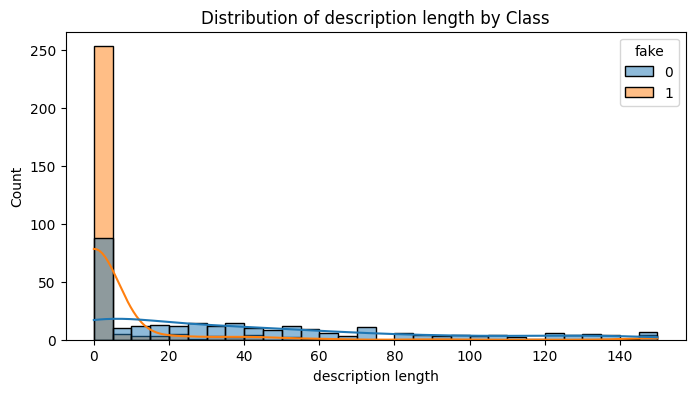

In [41]:
num_features = ['nums/length username', 'nums/length fullname', 'description length']
for col in num_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=train_df, x=col, hue='fake', kde=True, bins=30)
    plt.title(f"Distribution of {col} by Class")
    plt.show()


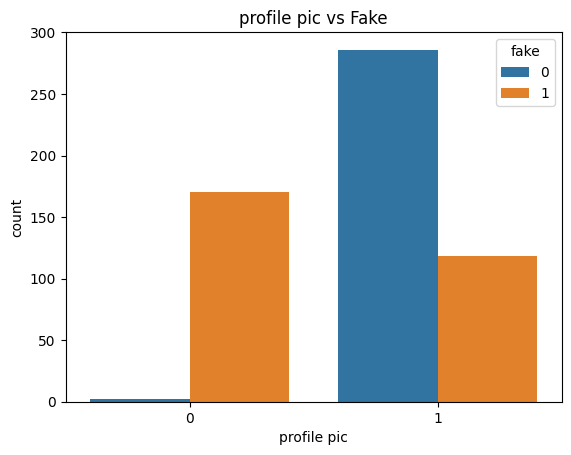

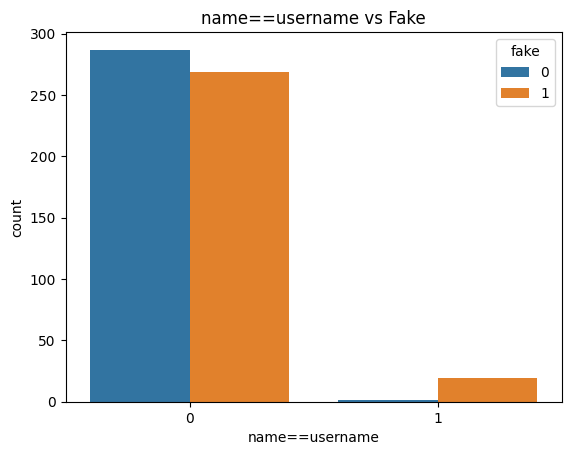

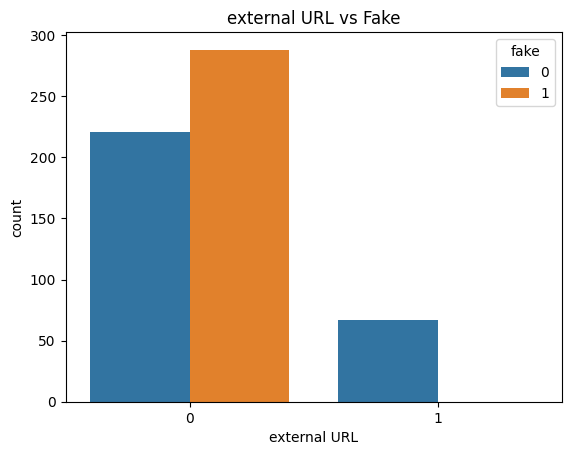

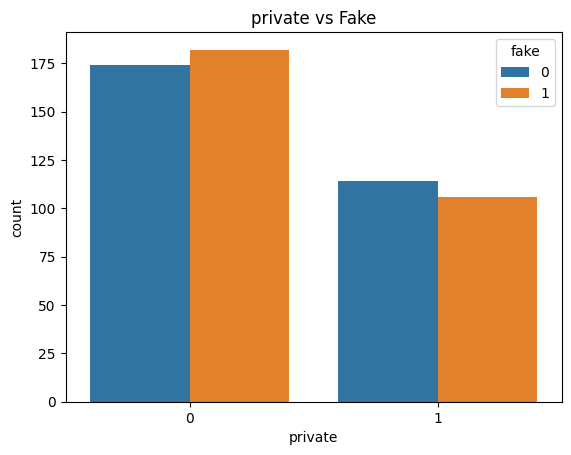

In [42]:
binary_cols = ['profile pic', 'name==username', 'external URL', 'private']
for col in binary_cols:
    sns.countplot(x=col, hue='fake', data=train_df)
    plt.title(f"{col} vs Fake")
    plt.show()


In [43]:
from xgboost import XGBClassifier


In [44]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [45]:
y_pred_xgb = xgb_model.predict(X_test)


In [46]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Text results
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.925

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92        60
           1       0.92      0.93      0.93        60

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.92       120
weighted avg       0.93      0.93      0.92       120



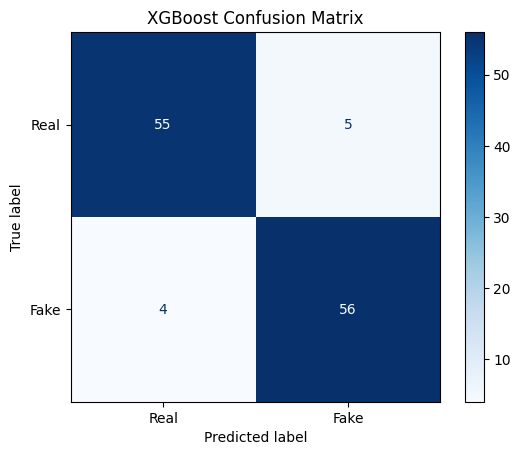

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])
disp.plot(cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.show()


In [49]:
type(X_train)



numpy.ndarray

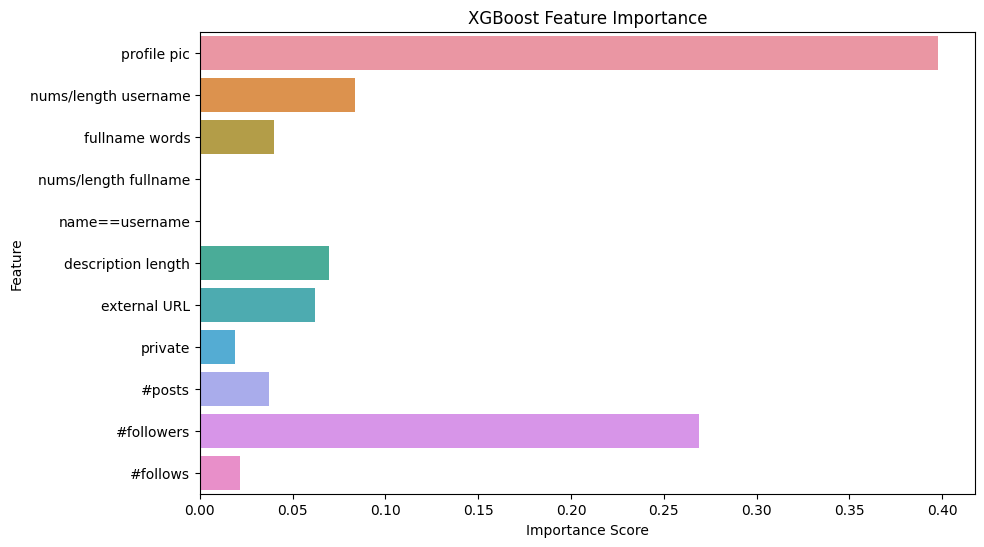

In [50]:
# Save column names from DataFrame
feature_names = train_df.drop('fake', axis=1).columns

# Use these when plotting
importances = xgb_model.feature_importances_

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
